In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings("ignore")

#### Read and Wrangling Data

In [3]:
df = pd.read_csv("C:\\Users\\Hamzawi\\Downloads\\Data-Collisions.csv", encoding='utf8')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df_new = df[['X', 'Y','LOCATION','INCDATE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SEVERITYCODE']]
df_new.head()

,X,Y,LOCATION,INCDATE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,2013/03/27 00:00:00+00,N,Overcast,Wet,Daylight,2
1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2006/12/20 00:00:00+00,0,Raining,Wet,Dark - Street Lights On,1
2,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,2004/11/18 00:00:00+00,0,Overcast,Dry,Daylight,1
3,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,2013/03/29 00:00:00+00,N,Clear,Dry,Daylight,1
4,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,2004/01/28 00:00:00+00,0,Raining,Wet,Daylight,2


In [5]:
# Drop the null values from data
df_new.dropna(how='any',inplace=True)

In [6]:
# Remove the time from the date
df_new['INCDATE'] = pd.to_datetime(df_new['INCDATE']).dt.date;

In [7]:
df_new.head() 

,X,Y,LOCATION,INCDATE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,2013-03-27,N,Overcast,Wet,Daylight,2
1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2006-12-20,0,Raining,Wet,Dark - Street Lights On,1
2,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,2004-11-18,0,Overcast,Dry,Daylight,1
3,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,2013-03-29,N,Clear,Dry,Daylight,1
4,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,2004-01-28,0,Raining,Wet,Daylight,2


In [8]:
df_new['UNDERINFL'].unique()

array(['N', '0', '1', 'Y'], dtype=object)

In [9]:
# Solve the problem of multiple values for the under the influence of drugs or alcohol
df_new['UNDERINFL'].replace( to_replace=['0'], value='N', inplace=True)
df_new['UNDERINFL'].replace( to_replace=['1'], value='Y', inplace=True)
df_new['UNDERINFL'].unique()

array(['N', 'Y'], dtype=object)

In [10]:
df_new.head()

,X,Y,LOCATION,INCDATE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,2013-03-27,N,Overcast,Wet,Daylight,2
1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2006-12-20,N,Raining,Wet,Dark - Street Lights On,1
2,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,2004-11-18,N,Overcast,Dry,Daylight,1
3,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,2013-03-29,N,Clear,Dry,Daylight,1
4,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,2004-01-28,N,Raining,Wet,Daylight,2


#### Data Analysis

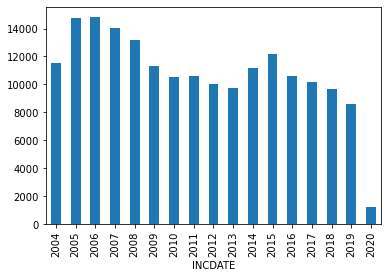

In [11]:
# Number of collisions over years
df_new["INCDATE"] = df_new["INCDATE"].astype("datetime64")
df_new.groupby(df_new["INCDATE"].dt.year)["SEVERITYCODE"].count().plot(kind="bar")

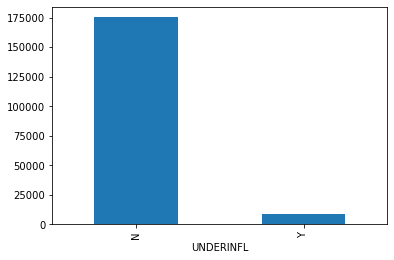

In [12]:
df_new.groupby(df_new["UNDERINFL"])["UNDERINFL"].count().plot(kind="bar")

In [13]:
alcohol = df_new.groupby(df_new["UNDERINFL"])["UNDERINFL"].count()
rate_of_drunk_people = (alcohol[1]/alcohol[0])*100
print("Number of collisions, which were under the alcohol and drugs, are {:.2f}%".format(rate_of_drunk_people))

Number of collisions, which were under the alcohol and drugs, are 5.05%


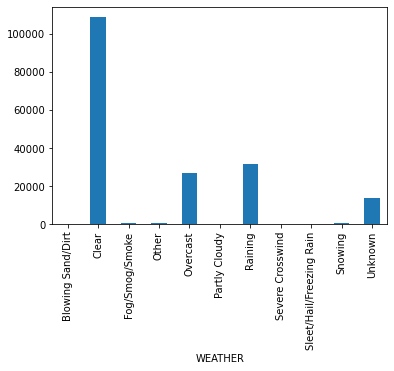

In [14]:
df_new.groupby(df_new["WEATHER"])["WEATHER"].count().plot(kind="bar")

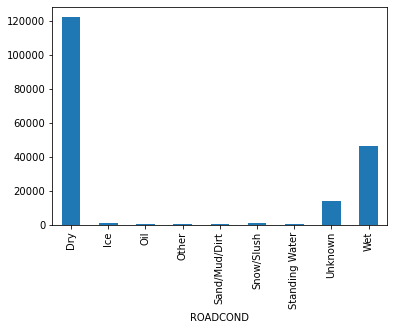

In [15]:
df_new.groupby(df_new["ROADCOND"])["ROADCOND"].count().plot(kind="bar")

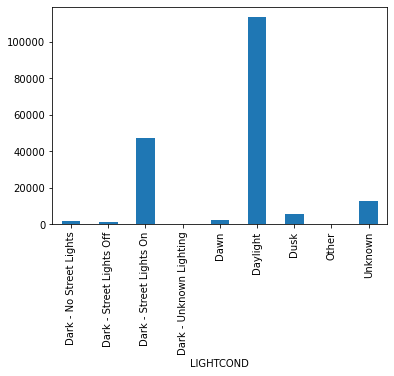

In [16]:
df_new.groupby(df_new["LIGHTCOND"])["LIGHTCOND"].count().plot(kind="bar")

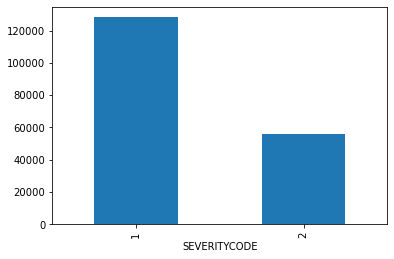

In [17]:
df_new.groupby(df_new["SEVERITYCODE"])["SEVERITYCODE"].count().plot(kind="bar")

In [18]:
types_collision = df_new.groupby(df_new["SEVERITYCODE"])["SEVERITYCODE"].count()
types_collision_rate = (types_collision[2]/types_collision[1])*100
print("the percentage of collisions having injuries is {:.2f}%".format(types_collision_rate))

the percentage of collisions having injuries is 43.71%


#### Machine Learning Algorithm - KNN

In [20]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_new[['UNDERINFL']] =label_encoder.fit_transform(df_new[['UNDERINFL']])
df_new[['WEATHER']] =label_encoder.fit_transform(df_new[['WEATHER']])
df_new[['ROADCOND']] =label_encoder.fit_transform(df_new[['ROADCOND']])
df_new[['LIGHTCOND']] =label_encoder.fit_transform(df_new[['LIGHTCOND']])

df_new.drop(['LOCATION','INCDATE'],axis=1,inplace=True)

# Create feature and target arrays 
X = df_new.loc[:,'X':'LIGHTCOND'].to_numpy()
df_new['SEVERITYCODE'] = pd.to_numeric(df_new['SEVERITYCODE'], downcast="float")
y = df_new.loc[:,'SEVERITYCODE'].to_numpy() - 1


# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 
  
knn = KNeighborsClassifier(n_neighbors=7,p=2) 
  
knn.fit(X_train, y_train) 
  
# Calculate the accuracy of the model 
print(knn.score(X_test, y_test)) 

0.6503773687354075


In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,C=1.0, solver='lbfgs', multi_class='ovr').fit(X_train,y_train)
clf.score(X_test, y_test)

0.6951729380463701